# 7-1. ÌîÑÎ°úÏ†ùÌä∏ : Ï£ºÏãù ÏòàÏ∏°Ïóê ÎèÑÏ†ÑÌï¥ Î≥¥Ïûê


ARIMAÎ•º ÌÜµÌï¥ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°ÌïòÎäî Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï¥ Î≥¥ÏïòÏäµÎãàÎã§. Ïù¥Ï†ú Ïã§Ï†ú Ï£ºÏãùÍ∞í ÏòàÏ∏°Ïóê ÎèÑÏ†ÑÌï¥ Î¥ÖÏãúÎã§. 

Îç∞Ïù¥ÌÑ∞Îäî Í≥ºÍ±∞Ïùò ÏùºÏûêÎ≥Ñ ÏãúÏÑ∏ÏûÖÎãàÎã§. Ïö∞ÏÑ† ÎåÄÌïúÎØºÍµ≠ ÎåÄÏû•Ï£º ÏÇºÏÑ±Ï†ÑÏûêÏóê ÎåÄÌïú Ï£ºÏãù ÏãúÏÑ∏Î•º ÏòàÏ∏°Ìï¥ Î¥ÖÏãúÎã§.



Ïö∞ÏÑ† Ï£ºÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†ÑÏùÑ ÌôïÏù∏Ìï¥ Î¥ÖÏãúÎã§.






In [62]:
import pandas
import sklearn
import statsmodels

print(pandas.__version__)
print(sklearn.__version__)
print(statsmodels.__version__)

1.3.3
1.0
0.13.0


## STEP 1 : ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

ÏπºÎüº Ï¢ÖÎ•ò: Date, Open, High, Low, Close, Adj Close, Volume
    
ÎÇ†ÏßúÎ≥ÑÎ°ú ÏãúÏûëÍ∞Ä(Open), ÏµúÍ≥†Í∞Ä(High), ÏµúÏ†ÄÍ∞Ä(Low), Ï¢ÖÍ∞Ä(Close), ÏàòÏ†ïÏ¢ÖÍ∞Ä(Adj Close), Í±∞ÎûòÎüâ(Volume)Ïù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Ïö∞Î¶¨Îäî Ï¢ÖÍ∞Ä(Close)Îßå ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. (Ï£ºÏãù ÏãúÏû•ÏùÄ Ï†ïÌï¥ÏßÑ ÏãúÍ∞Ñ ÎèôÏïàÎßå Í±∞ÎûòÍ∞Ä Í∞ÄÎä•Ìï©ÎãàÎã§. Ï¢ÖÍ∞ÄÎûÄ ÌïòÎ£®Ïùò Ïû•Ïù¥ ÎßàÍ∞êÌïòÏòÄÏùÑ ÎïåÏùò Í∞ÄÍ≤©ÏûÖÎãàÎã§.)

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [64]:
# Time Series ÏÉùÏÑ±
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
df

Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2020-05-18  47950.0  49100.0  47600.0  48800.0  46788.835938  20481981
2020-05-19  50100.0  50500.0  49700.0  50300.0  48227.015625  25168295
2020-05-20  50000.0  50200.0  49800.0  50000.0  47939.382813  14896899
2020-05-21  50300.0  50400.0  49850.0  49950.0  47891.437500  14949266
2020-05-22  49600.0  49800.0  48600.0  48750.0  46740.894531  19706284
...             ...      ...      ...      ...           ...       ...
2021-05-12  80800.0  81200.0  79800.0  80000.0  80000.000000  35812268
2021-05-13  78900.0  79600.0  78400.0  78500.0  78500.000000  31490096
2021-05-14  79000.0  80300.0  78900.0  80100.0  80100.000000  16450920
2021-05-17  80800.0  80900.0  79200.0  79600.0  79600.000000  17740855
2021-05-18  79600.0  80000.0  79100.0  79600.0  79600.000000  17265868

[250 rows x 6 columns]

In [65]:
ts_close = df['Close']  # Ïö∞ÏÑ†ÏùÄ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏Ïö©Ïù¥Îãà time series Ïùò Ïù¥ÎãàÏÖúÏùÑ Îî∞ÏÑú 'ts_close'ÎùºÍ≥† Ïù¥Î¶Ñ Î∂ôÏó¨Ï§çÏãúÎã§!
print(type(ts_close))
ts_close.head()

<class 'pandas.core.series.Series'>


Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

## STEP 2 : ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù
* Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
* Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test

### **ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ±Ïùò Ï†ïÏÑ±Ï†Å Î∂ÑÏÑù**

ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÏïàÏ†ïÏÑ±(Stationarity) Ïó¨Î∂ÄÎ•º ÌôïÏù∏

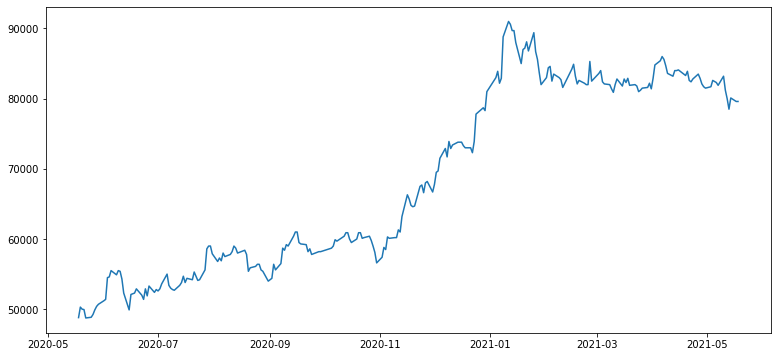

In [66]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab Ï∞®Ìä∏Ïùò Í∏∞Î≥∏ ÌÅ¨Í∏∞Î•º 13, 6ÏúºÎ°ú ÏßÄÏ†ïÌï¥ Ï§çÎãàÎã§.

# ÏãúÍ≥ÑÏó¥(time series) Îç∞Ïù¥ÌÑ∞Î•º Ï∞®Ìä∏Î°ú Í∑∏Î†§ Î¥ÖÏãúÎã§. ÌäπÎ≥ÑÌûà Îçî Í∞ÄÍ≥µÌïòÏßÄ ÏïäÏïÑÎèÑ Ïûò Í∑∏Î†§ÏßëÎãàÎã§.
plt.plot(ts_close)

### ÏãúÍ∞Ñ Ï∂îÏù¥Ïóê Îî∞Îùº ÏùºÏ†ïÌïú ÌèâÍ∑†, Î∂ÑÏÇ∞, ÏûêÍ∏∞Í≥µÎ∂ÑÏÇ∞Ïùò Ìå®ÌÑ¥Ïù¥ ÎÇòÌÉÄÎÇòÎäîÏßÄ ÌÜµÍ≥ÑÏ†Å ÌäπÏÑ±ÏùÑ Îçî Î™ÖÎ£åÌïòÍ≤å ÏãúÍ∞ÅÌôî
- ÏùºÏ†ï ÏãúÍ∞Ñ ÎÇ¥¬†`Íµ¨Í∞Ñ ÌÜµÍ≥ÑÏπò(Rolling Statistics)`Î•º ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®Ïàò ÏÉùÏÑ±
    
    `ÌòÑÏû¨ ÌÉÄÏûÑ Ïä§ÌÖù`¬†Î∂ÄÌÑ∞¬†`windowÏóê Ï£ºÏñ¥ÏßÑ ÌÉÄÏûÑ Ïä§ÌÖù Ïù¥Ï†Ñ`¬†ÏÇ¨Ïù¥
    
    1) Íµ¨Í∞ÑÏùò ÌèâÍ∑†(rolling mean,¬†`Ïù¥ÎèôÌèâÍ∑†`)Í≥º
    
    2) Íµ¨Í∞ÑÏùò ÌëúÏ§ÄÌé∏Ï∞®(rolling std,¬†`Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®`)Î•º
    
    ÏõêÎ≥∏ ÏãúÍ≥ÑÏó¥Í≥º Ìï®Íªò¬†ÏãúÍ∞ÅÌôîÌï¥ Î≥¥Î©¥ Ï¢Ä Îçî ÎöúÎ†∑Ìïú Í≤ΩÌñ•ÏÑ±ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå

In [67]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std()    # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

     # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º plotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ Î≥∏Îã§.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

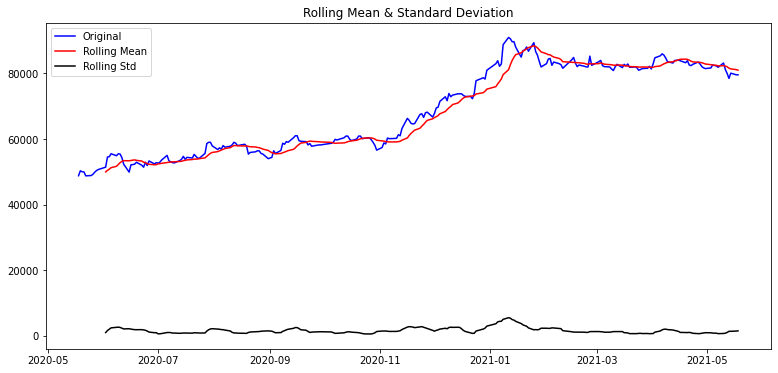

In [68]:
plot_rolling_statistics(ts_close, window=12)

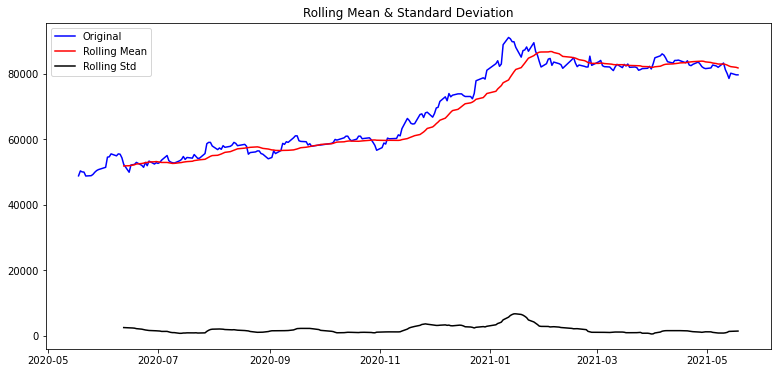

In [69]:
plot_rolling_statistics(ts_close, window=20)
## Ï£ºÎßêÏùÑ Ï†úÏô∏ÌïòÍ≥† ÌèâÏùº 5Ïùº X 4Ï£º = 20ÏùºÏùÑ ÌïúÎã¨Î°ú Í≥ÑÏÇ∞

### üìä Î∂ÑÏÑù :
ÏãúÍ∞ÑÏùò Ï∂îÏù¥Ïóê Îî∞Îùº ÏãúÍ≥ÑÏó¥Ïùò ÌèâÍ∑†Í≥º ÏßÄÏÜçÏ†ÅÏúºÎ°ú Ïª§ÏßÄÎäî Ìå®ÌÑ¥Ïù¥Î©∞ Î∂ÑÏÇ∞Ïù¥ Í≥†Î•¥ÏßÄ ÏïäÏùå > ÏïàÏ†ïÏ†ÅÏù¥ÏßÄ Î™ªÌï®

### Original data ADFTest
statsmodels¬†Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî¬†adfuller¬†Î©îÏÑúÎìúÎ•º Ïù¥Ïö©Ìï¥¬†Ï£ºÏñ¥ÏßÑ timeseriesÏóê ÎåÄÌïú Augmented Dickey-Fuller TestÎ•º ÏàòÌñâ

In [70]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÑúÎìúÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller Î©îÏÑúÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [71]:
augmented_dickey_fuller_test(ts_close)

Results of Dickey-Fuller Test:
Test Statistic                  -1.222649
p-value                          0.663778
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


### üìä Î∂ÑÏÑù :
Ïò§Î¶¨ÏßÄÎÇ† Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî ADFtest Í≤∞Í≥º -1.22Í∞íÏùÑ ÏñªÏóàÏúºÎ©∞ p-valueÍ∞Ä 0.66Í∞íÏù¥Îã§. 

Îî∞ÎùºÏÑú Ïù¥Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÍ∏∞Ïóê Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏïÑ 'Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïàÏ†ïÏ†ÅÏù¥ÏßÄ Î™ªÌïòÎã§'ÎùºÍ≥† Ìï¥ÏÑùÌï† Ïàò ÏûàÎã§.

## STEP 3 : Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ
* Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
* Î°úÍ∑∏ Î≥ÄÌôò

### Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [72]:
# Í≤∞Ï∏°Ïπò Ïú†Î¨¥ ÌôïÏù∏
ts_close[ts_close.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§.

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
# ts_close = ts_close.interpolate(method='time')
# ts_close[ts_close.isna()]

Series([], Name: Close, dtype: float64)

### üìä Î∂ÑÏÑù :
Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå

### Î°úÍ∑∏ Î≥ÄÌôò

**1-1. Î°úÍ∑∏Ìï®Ïàò Î≥ÄÌôò**

ÏãúÍ∞Ñ Ï∂îÏù¥Ïóê Îî∞Îùº Î∂ÑÏÇ∞Ïù¥ Ï†êÏ†ê Ïª§ÏßÄÍ≥† ÏûàÎã§Îäî Ï†êÏùÑ Í≥†Î†§ 

\>> ÏãúÍ≥ÑÏó¥Ïù¥ Ïù¥Îü∞ ÌäπÏÑ±ÏùÑ Î≥¥Ïùº Í≤ΩÏö∞ÏóêÎäî Î°úÍ∑∏Ìï®ÏàòÎ°ú Î≥ÄÌôò

In [73]:
# Î°úÍ∑∏ Î≥ÄÌôò
ts_log = np.log(ts_close)
type(ts_log)

pandas.core.series.Series

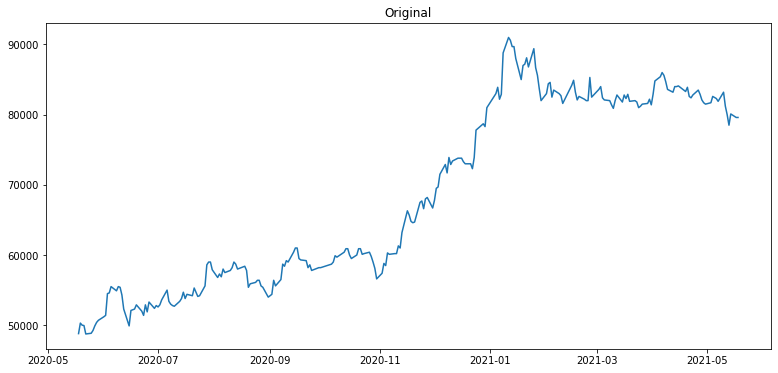

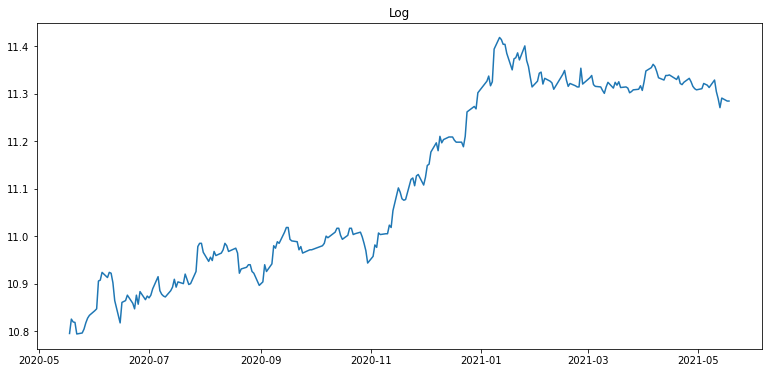

In [74]:
plt.plot(ts_close)
plt.title("Original")
plt.show()
plt.plot(ts_log)
plt.title("Log")
plt.show()

In [75]:
# Î°úÍ∑∏ Î≥ÄÌôòÏùò Ìö®Í≥ºÍ∞Ä Ïñ¥Îñ†ÌñàÎäîÏßÄ Îî∞Ï†∏ Î≥¥Í∏∞ ÏúÑÌï¥ Augmented Dickey-Fuller TestÎ•º ÏàòÌñâ
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


### üìä Î∂ÑÏÑù :
Log Î≥ÄÌôò Îç∞Ïù¥ÌÑ∞Î°ú ADFtestÎ•º Ïã§ÌñâÌïú Í≤∞Í≥º, -1.38Í∞íÏùÑ ÏñªÏóàÏúºÎ©∞ p-valueÍ∞Ä 0.59Í∞íÏù¥Îã§. 

Ï†ïÏÑ±Ï†ÅÏúºÎ°úÎèÑ ÏãúÍ∞Ñ Ï∂îÏù¥Ïóê Îî∞Î•∏ Î∂ÑÏÇ∞Ïù¥ ÍΩ§ ÏùºÏ†ïÌï¥ÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

testÍ∞íÍ≥º p-value Î™®Îëê Ï§ÑÏñ¥Îì§ÏóàÏßÄÎßå, Ïó¨Ï†ÑÌûà Îëê Í∞íÎì§ Î™®Îëê Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÍ∏∞Ïóê Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏïÑ 'Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïàÏ†ïÏ†ÅÏù¥ÏßÄ Î™ªÌïòÎã§'ÎùºÍ≥† Ìï¥ÏÑùÌï† Ïàò ÏûàÎã§.

ÌïòÏßÄÎßå ÏïÑÏßÅ Í∞ÄÏû• ÎëêÎìúÎü¨ÏßÄÎäî Î¨∏Ï†úÏ†êÏùÄ ÏãúÍ∞Ñ Ï∂îÏù¥Ïóê Îî∞Îùº ÌèâÍ∑†Ïù¥ Í≥ÑÏÜç Ï¶ùÍ∞ÄÌïúÎã§Îäî Í≤ÉÏù¥Îã§.

## STEP 4 : ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥
* ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥(Time Series Decomposition)
* Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏

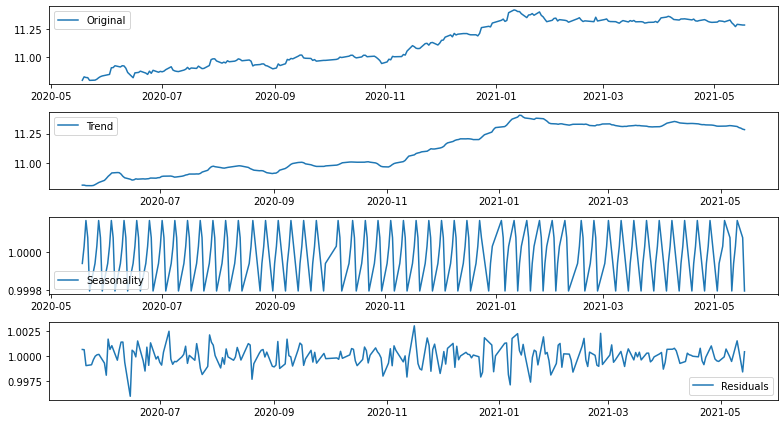

In [76]:
# seasonal_decompose¬†
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 5)
decomposition2 = seasonal_decompose(ts_log, model='multiplicative', period = 20)

trend = decomposition.trend # Ï∂îÏÑ∏(ÏãúÍ∞Ñ Ï∂îÏù¥Ïóê Îî∞Îùº ÎÇòÌÉÄÎÇòÎäî ÌèâÍ∑†Í∞í Î≥ÄÌôî )
seasonal = decomposition.seasonal # Í≥ÑÏ†àÏÑ±(Ìå®ÌÑ¥Ïù¥ ÌååÏïÖÎêòÏßÄ ÏïäÏùÄ Ï£ºÍ∏∞Ï†Å Î≥ÄÌôî)
residual = decomposition.resid # ÏõêÎ≥∏(Î°úÍ∑∏Î≥ÄÌôòÌïú) - Ï∂îÏÑ∏ - Í≥ÑÏ†àÏÑ±
residual2 = decomposition2.resid

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### üìä Î∂ÑÏÑù :

**Trend** : 2020ÎÖÑ 7Ïõî Ïù¥ÌõÑ Ï†êÏ†ê ÏÉÅÏäπÌïòÎã§Í∞Ä 2020ÎÖÑ 11Ïõî Ïù¥ÌõÑ Í∏âÎì±ÌïòÏó¨ ÏïàÏ†ïÏùÑ Ï∞æÎäî Ï∂îÏÑ∏Î•º Í∞ÄÏßÄÍ≥† ÏûàÎã§.

**Seasonality** : 
1) window = 20 (ÌèâÏùº 5Ïùº x 4Ï£º = 20Ïùº)
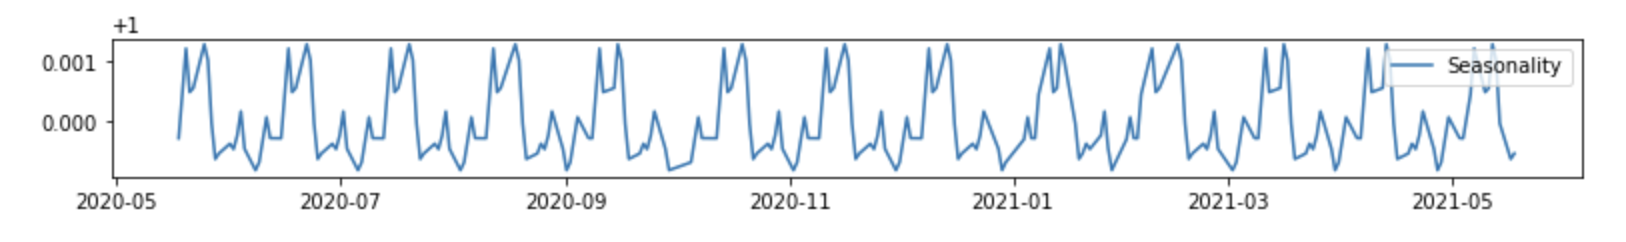
2) window = 5 (ÌèâÏùº 5Ïùº)
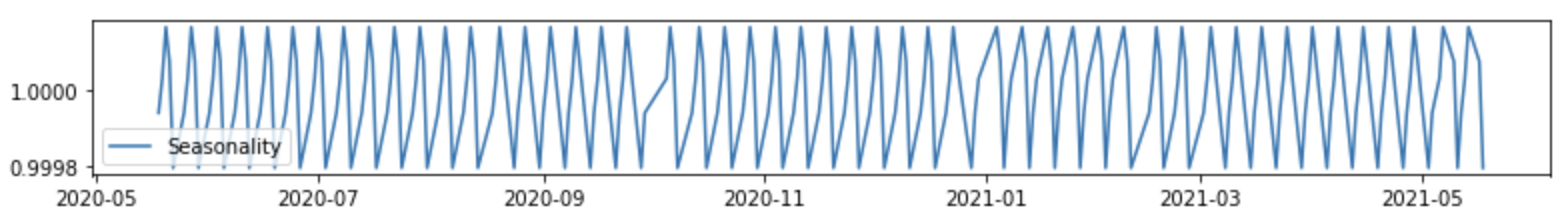

**Residual** : Original¬†ÏãúÍ≥ÑÏó¥ÏóêÏÑú¬†TrendÏôÄ¬†SeasonalityÎ•º Ï†úÍ±∞ÌïòÍ≥† ÎÇú ÎÇòÎ®∏ÏßÄÎ•º¬†ResidualÏù¥ÎùºÍ≥† Ìï©ÎãàÎã§. (Trend+Seasonality+Residual=Original)

### ResidualÏóê ÎåÄÌï¥ ÏïàÏ†ïÏÑ± Ïó¨Î∂Ä

In [77]:
residual

Date
2020-05-18         NaN
2020-05-19         NaN
2020-05-20    1.000661
2020-05-21    1.000640
2020-05-22    0.999060
                ...   
2021-05-12    0.999416
2021-05-13    0.998433
2021-05-14    1.000438
2021-05-17         NaN
2021-05-18         NaN
Name: resid, Length: 250, dtype: float64

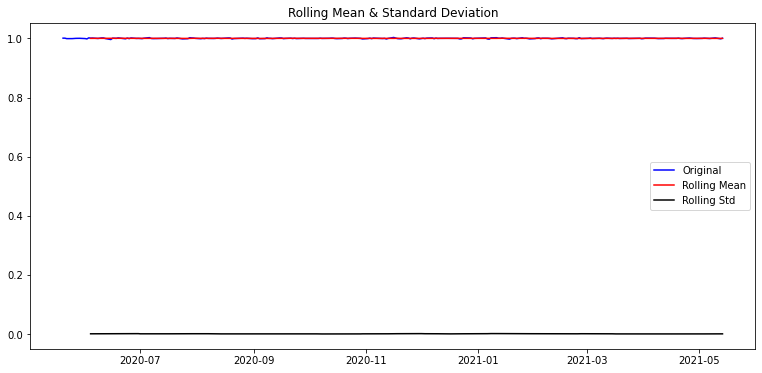

In [78]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [79]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -9.783378e+00
p-value                        6.641628e-17
#Lags Used                     6.000000e+00
Number of Observations Used    2.390000e+02
Critical Value (1%)           -3.458011e+00
Critical Value (5%)           -2.873710e+00
Critical Value (10%)          -2.573256e+00
dtype: float64


In [80]:
residual2.dropna(inplace=True)
augmented_dickey_fuller_test(residual2)

Results of Dickey-Fuller Test:
Test Statistic                -6.204111e+00
p-value                        5.712839e-08
#Lags Used                     0.000000e+00
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64


### üìä Î∂ÑÏÑù:
DecomposingÏùÑ ÌÜµÌï¥ ÏñªÏñ¥ÏßÑ¬†ResidualÏùÄ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ¬†p-valueÎ•º Î≥¥Ïó¨ Ï§å.

Ïù¥ Ï†ïÎèÑÎ©¥ ÌôïÏã§Ìûà ÏòàÏ∏° Í∞ÄÎä•Ìïú ÏàòÏ§ÄÏùò ÏïàÏ†ïÏ†ÅÏù∏ ÏãúÍ≥ÑÏó¥ÏùÑ ÏñªÏùå

ÎòêÌïú windowÎ•º 20ÏúºÎ°ú ÏÑ§Ï†ïÌñàÏùÑÎïåÏôÄ 5Î°ú ÏÑ§Ï†ïÌïòÏòÄÏùÑ ÎïåÎ•º ÎπÑÍµêÌïòÎ©¥, 5Î°ú ÏÑ§Ï†ïÌïòÏó¨ Ï£ºÎ≥ÑÎ°ú Î∂ÑÏÑùÌïòÎäîÍ≤ÉÏù¥ ÏïàÏ†ïÏÑ±Ïù¥ Îçî ÎÜíÏùå

## STEP 5 : ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
* ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨





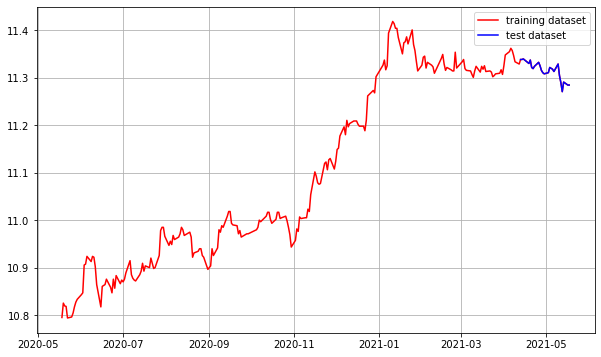

In [81]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()


## STEP 6 : Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞
* ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
* Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


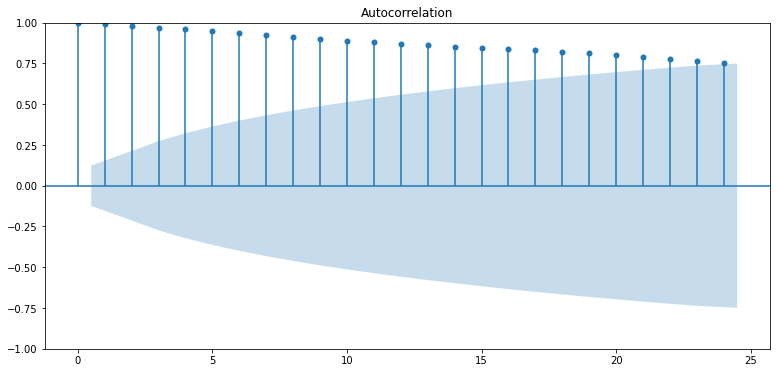

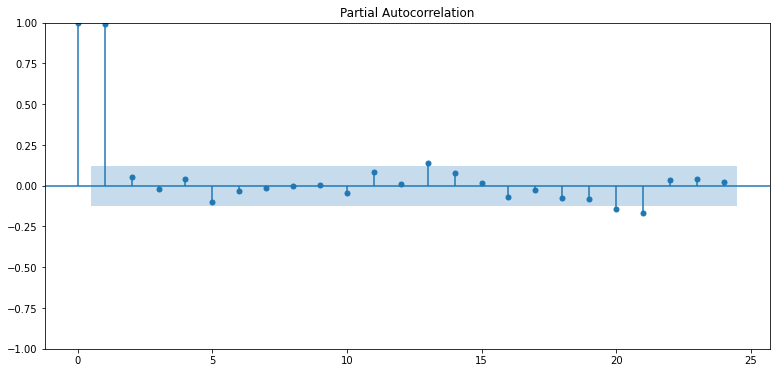

In [82]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

### üìä Î∂ÑÏÑù:
    
ACFÎ•º ÌÜµÌï¥ MA Î™®Îç∏Ïùò ÏãúÏ∞® qÎ•º Í≤∞Ï†ïÌïòÍ≥†,¬†PACFÎ•º ÌÜµÌï¥ AR Î™®Îç∏Ïùò ÏãúÏ∞® pÎ•º Í≤∞Ï†ïÌï† Ïàò ÏûàÏùå
    
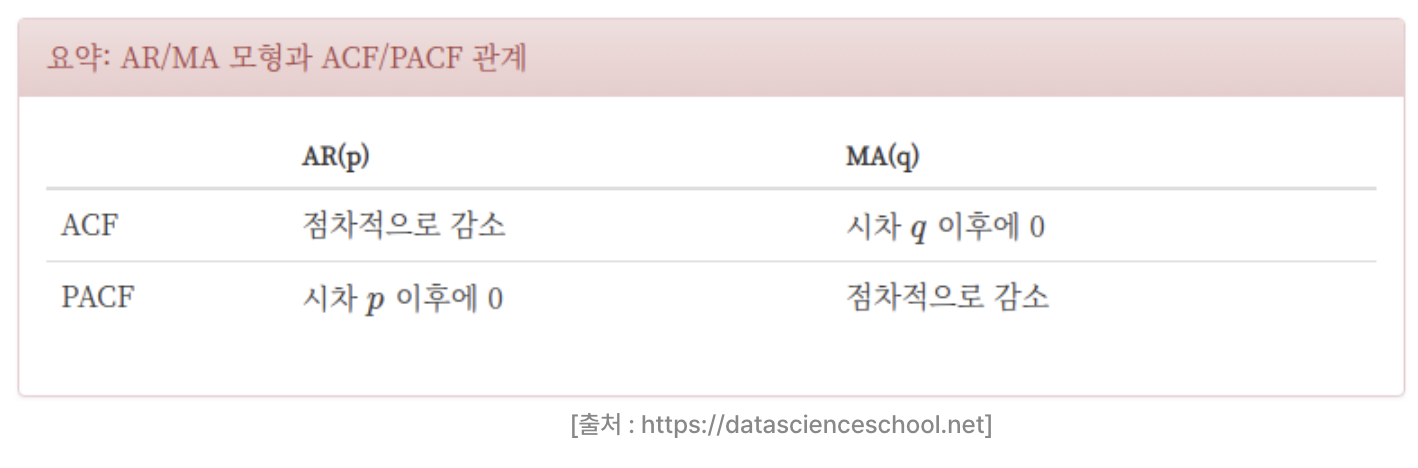
    
Ïù¥ Í≤∞Î°†Ïóê Îî∞Îùº Î≥¥ÏûêÎ©¥¬†**PACF**¬†Í∑∏ÎûòÌîÑÎ•º Î≥º Îïå¬†`p=1`Ïù¥ Îß§Ïö∞ Ï†ÅÌï©Ìï® >> `p`Í∞Ä 2 Ïù¥ÏÉÅÏù∏ Íµ¨Í∞ÑÏóêÏÑú¬†**PACF**Îäî Í±∞Ïùò 0Ïóê Í∞ÄÍπåÏõåÏßÄÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏
    
**PACF**Í∞Ä 0Ïù¥ÎùºÎäî ÏùòÎØ∏Îäî ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞ÏôÄ¬†`p`ÏãúÏ†ê Îñ®Ïñ¥ÏßÑ Ïù¥Ï†ÑÏùò Îç∞Ïù¥ÌÑ∞Îäî ÏÉÅÍ¥ÄÎèÑÍ∞Ä 0, Ï¶â ÏïÑÎ¨¥ ÏÉÅÍ¥Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Í≥†Î†§Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÎã§Îäî ÎúªÏù¥Îã§.

Î∞òÎ©¥¬†**ACF**Îäî Ï†êÏ∞®Ï†ÅÏúºÎ°ú Í∞êÏÜåÌïòÍ≥† ÏûàÏñ¥ÏÑú¬†`AR(1)`¬†Î™®Îç∏Ïóê Ïú†ÏÇ¨Ìïú ÌòïÌÉú

`q`Ïóê ÎåÄÌï¥ÏÑúÎäî Ï†ÅÌï©Ìïú Í∞íÏù¥ ÏóÜÏñ¥ Î≥¥ÏûÑ >>¬†MAÎ•º Í≥†Î†§Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÎã§Î©¥¬†`q=0`

Îî∞ÎùºÏÑú **p=1**, **q=0**

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


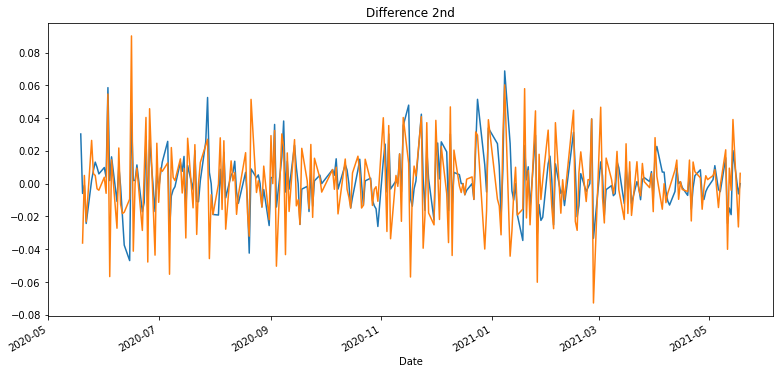

In [83]:
# Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### üìä Î∂ÑÏÑù:
1Ï∞® Ï∞®Î∂ÑÏúºÎ°úÎèÑ Ï∂©Î∂ÑÌûà ÏïàÏ†ïÏÑ±Ïù¥ Î≥¥Ïû•ÎêòÎØÄÎ°ú **d=1**Î°ú ÏÑ§Ï†ï

## STEP 7 : ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏
* ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®
* Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ
* ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [84]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 583.370
Date:                Thu, 29 Feb 2024   AIC                          -1158.741
Time:                        09:17:14   BIC                          -1145.076
Sample:                             0   HQIC                         -1153.226
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.127     87.360      0.000      10.841      11.338
ar.L1          0.9942      0.006    157.934      0.000       0.982       1.007
ma.L1          0.0392      0.063      0.623      0.5

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


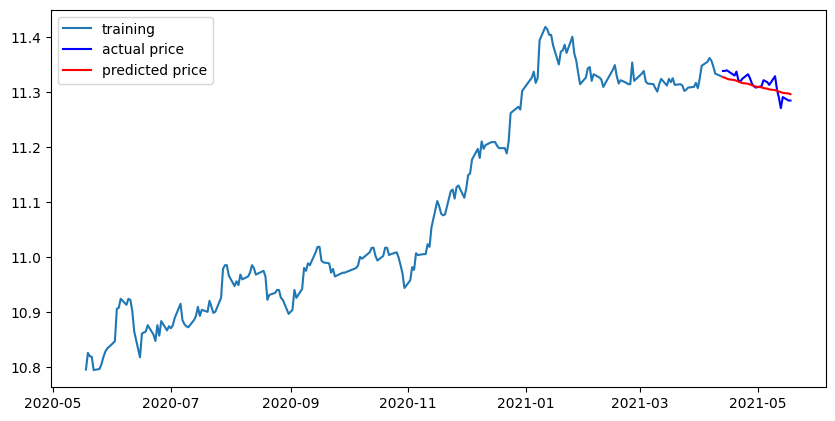

In [85]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1057119.8161340475
MAE:  850.8270312480739
RMSE:  1028.1633217218202
MAPE: 1.04%


### üìä Î∂ÑÏÑù :
MAPE Í∏∞Ï§ÄÏúºÎ°ú 0.05% Ï†ïÎèÑÏùò Ïò§Ï∞®Ïú® >> ÎßåÏ°±Ïä§Îü¨Ïö¥ ÏÑ±Îä•

# SM EntertainmentÏùò Ï£ºÏãùÎç∞Ïù¥ÌÑ∞Î°ú Ï†ÅÏö©Ìï¥Î≥¥Í∏∞

In [87]:
# Time Series ÏÉùÏÑ±
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/SMCE.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
df

Open     High      Low   Close  Adj Close    Volume
Date                                                              
2023-03-01  0.00130  0.00140  0.00100  0.0011     0.0011  23939527
2023-03-02  0.00110  0.00125  0.00100  0.0010     0.0010  10613883
2023-03-03  0.00100  0.00110  0.00100  0.0011     0.0011   2276050
2023-03-06  0.00110  0.00120  0.00100  0.0010     0.0010   9449218
2023-03-07  0.00100  0.00110  0.00100  0.0010     0.0010   2489400
...             ...      ...      ...     ...        ...       ...
2024-02-22  0.00063  0.00063  0.00060  0.0006     0.0006       200
2024-02-23  0.00068  0.00070  0.00065  0.0007     0.0007   1767338
2024-02-26  0.00070  0.00070  0.00070  0.0007     0.0007   1152200
2024-02-27  0.00070  0.00070  0.00070  0.0007     0.0007         0
2024-02-28  0.00060  0.00070  0.00060  0.0007     0.0007   1219848

[251 rows x 6 columns]

In [88]:
ts_close = df['Close']  # Ïö∞ÏÑ†ÏùÄ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏Ïö©Ïù¥Îãà time series Ïùò Ïù¥ÎãàÏÖúÏùÑ Îî∞ÏÑú 'ts_close'ÎùºÍ≥† Ïù¥Î¶Ñ Î∂ôÏó¨Ï§çÏãúÎã§!
print(type(ts_close))
ts_close.head()

<class 'pandas.core.series.Series'>


Date
2023-03-01    0.0011
2023-03-02    0.0010
2023-03-03    0.0011
2023-03-06    0.0010
2023-03-07    0.0010
Name: Close, dtype: float64

In [89]:
# Í≤∞Ï∏°Ïπò Ïú†Î¨¥ ÌôïÏù∏
ts_close[ts_close.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§.

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
# ts_close = ts_close.interpolate(method='time')
# ts_close[ts_close.isna()]

Series([], Name: Close, dtype: float64)

In [90]:
# Î°úÍ∑∏ Î≥ÄÌôò
ts_log = np.log(ts_close)
ts_log

Date
2023-03-01   -6.812445
2023-03-02   -6.907755
2023-03-03   -6.812445
2023-03-06   -6.907755
2023-03-07   -6.907755
                ...   
2024-02-22   -7.418581
2024-02-23   -7.264430
2024-02-26   -7.264430
2024-02-27   -7.264430
2024-02-28   -7.264430
Name: Close, Length: 251, dtype: float64

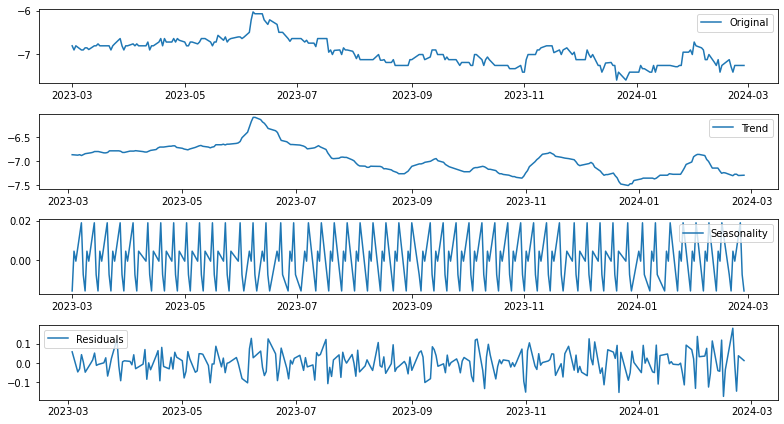

In [91]:
# seasonal_decompose¬†
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, period = 5)

trend = decomposition.trend # Ï∂îÏÑ∏(ÏãúÍ∞Ñ Ï∂îÏù¥Ïóê Îî∞Îùº ÎÇòÌÉÄÎÇòÎäî ÌèâÍ∑†Í∞í Î≥ÄÌôî )
seasonal = decomposition.seasonal # Í≥ÑÏ†àÏÑ±(Ìå®ÌÑ¥Ïù¥ ÌååÏïÖÎêòÏßÄ ÏïäÏùÄ Ï£ºÍ∏∞Ï†Å Î≥ÄÌôî)
residual = decomposition.resid # ÏõêÎ≥∏(Î°úÍ∑∏Î≥ÄÌôòÌïú) - Ï∂îÏÑ∏ - Í≥ÑÏ†àÏÑ±

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

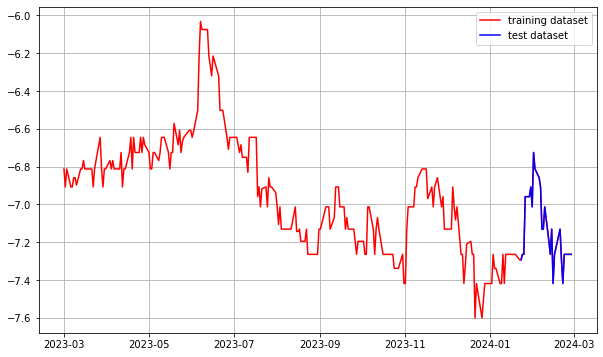

In [92]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


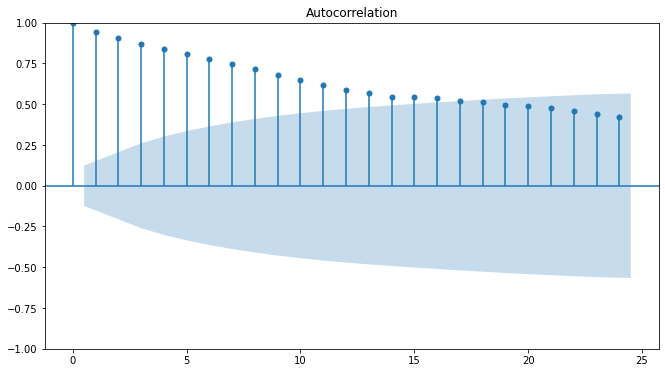

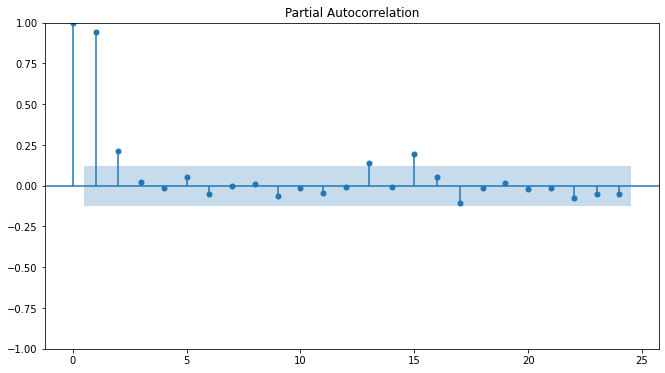

In [93]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                 -19.832917
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.062030e+00
p-value                        5.193850e-10
#Lags Used                     1.400000e+01
Number of Observations Used    2.340000e+02
Critical Value (1%)           -3.458608e+00
Critical Value (5%)           -2.873972e+00
Critical Value (10%)          -2.573396e+00
dtype: float64


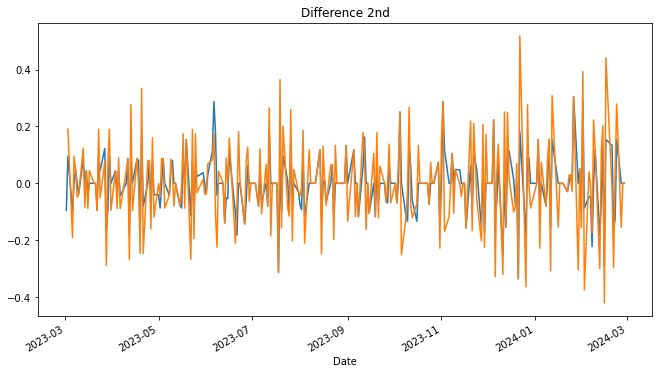

In [94]:
# Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### üìä Î∂ÑÏÑù :
* p = 2

* q = 0 or q = 16

* d = 1

In [95]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(0, 1, 2))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 218.709
Date:                Thu, 29 Feb 2024   AIC                           -431.419
Time:                        09:17:17   BIC                           -421.184
Sample:                             0   HQIC                          -427.287
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2095      0.061     -3.413      0.001      -0.330      -0.089
ma.L2          0.0190      0.066      0.289      0.773      -0.110       0.148
sigma2         0.0083      0.001     14.006      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


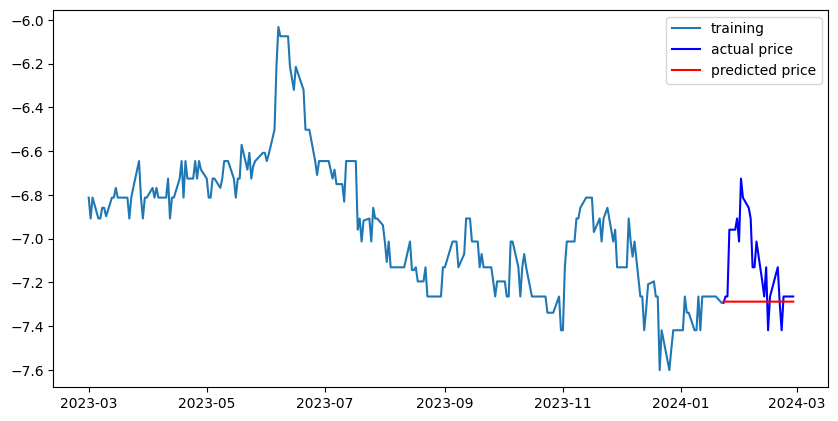

In [96]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  4.168301853544684e-08
MAE:  0.000143560948245587
RMSE:  0.00020416419503783428
MAPE: 15.30%


## ÌöåÍ≥†
Ï≤òÏùå ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Îã§Î§ÑÎ≥¥Í≥† ÏÉùÏÜåÌïú Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°Í∞íÏùÑ ÎßåÎì§Ïñ¥Î≥¥ÏïòÎã§.

Ïñ¥Î†§Ïö¥ Í∞úÎÖêÎì§Ïù¥ ÎßéÏïòÎçòÎßåÌÅº, Í¥ÄÎ†® ÏûêÎ£åÏôÄ ÎÖºÎ¨∏ÏùÑ Ï∞æÏïÑ ÎßéÏù¥ Ï∂îÍ∞Ä Í≥µÎ∂ÄÎ•º Ìï¥Î≥¥ÏïòÎçò Ï†êÏùÄ ÏûòÌïú Ï†êÏù¥Í≥†,
ÏàòÌïôÏ†Å ÏÑ§Î™ÖÏù¥ Ìè¨Ìï®Îêú Í∏ÄÏùÄ Ïûò Ïù¥Ìï¥ÌïòÏßÄ Î™ªÌïòÍ≥† Í∑∏ÎÉ• ÎÑòÏñ¥Í∞îÎçò Ï†êÏù¥ ÏïÑÏâ¨Ïõ†Îã§. Ï°∞Í∏à Îçî ÏãúÍ∞ÑÏùÑ Í∞ñÍ≥† ÏàòÌïôÏ†Å ÏÑ§Î™ÖÎèÑ Ïù¥Ìï¥Ìï† Ïàò ÏûàÍ≤å ÍπäÏù¥ Í≥µÎ∂ÄÌï† Ïàò ÏûàÎäî Ïã§Î†•ÏùÑ ÎßåÎìúÎäîÍ≤ÉÎèÑ ÏïûÏúºÎ°ú ÏÑ±Ïû•ÌïòÎäîÎç∞ ÏûàÏñ¥ Ï§ëÏöîÌïòÎã§Í≥† ÏÉùÍ∞ÅÌïúÎã§.

ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÎäî ts_logÎç∞Ïù¥ÌÑ∞Î•º Î™®Îç∏Ïóê Ï†ÅÏö©ÌïòÎäîÍ≤ÉÏóê ÎåÄÌï¥ÏÑú ÎßéÏùÄ Í≥†ÎØºÏùÑ ÌñàÎã§.
ts_logÎäî ÏïÑÏßÅ ÏÉÅÏäπÌïòÎäî Ï∂îÏÑ∏Î•º Í∞ÄÏßÄÍ≥† ÏûàÎäî ÌèâÍ∑†Ïù¥ÎÇò Ï£ºÍ∏∞ÏÑ±ÏùÑ Ï†úÍ±∞ÌïòÍ±∞ÎÇò Ï†ïÎ¶¨ÌïòÏßÄ Î™ªÌïú Îç∞Ïù¥ÌÑ∞ÏûÑÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† residualsÍ∞Ä ÏïÑÎãå logÎ≥ÄÌôò Îç∞Ïù¥ÌÑ∞Î•º train Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ïù¥Ìï¥Í∞Ä Ïûò ÎêòÏßÄ ÏïäÏïòÎã§.

**Ï∞æÏïÑ Î≥∏ Í≤∞Í≥º,**


ÏãúÍ∞Ñ Î∂ÑÌï¥ ÌõÑ Î°úÍ∑∏ Î≥ÄÌôò Í≤∞Í≥º ÎòêÎäî ÏûîÏ∞® Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÌï†Ìï†ÏßÄ Í≤∞Ï†ïÌïòÎäî Í≤ÉÏùÄ Ïó¨Îü¨ Í∞ÄÏßÄ ÏöîÏÜåÏóê Îî∞Îùº Îã¨ÎùºÏßëÎãàÎã§. ÏùºÎ∞òÏ†ÅÏúºÎ°ú Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏÇ¨Ìï≠ÏùÑ Í≥†Î†§Ìï¥Ïïº Ìï©ÎãàÎã§.

1. Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±

Î°úÍ∑∏ Î≥ÄÌôò Í≤∞Í≥º: Î°úÍ∑∏ Î≥ÄÌôòÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò Î≥ÄÎèôÏÑ±ÏùÑ Ï§ÑÏù¥Í≥† Ï†ïÍ∑ú Î∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å ÎßåÎìúÎäî Îç∞ ÎèÑÏõÄÏù¥ Îê©ÎãàÎã§. Îç∞Ïù¥ÌÑ∞Í∞Ä ÎπÑÎåÄÏπ≠Ï†ÅÏù¥Í±∞ÎÇò Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏùÄ Í≤ΩÏö∞ Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.
ÏûîÏ∞® Îç∞Ïù¥ÌÑ∞: ÏûîÏ∞® Îç∞Ïù¥ÌÑ∞Îäî Ï∂îÏÑ∏, Í≥ÑÏ†àÏÑ± Î∞è Í∏∞ÌÉÄ ÏöîÏÜåÎ•º Ï†úÍ±∞Ìïú ÌõÑ ÎÇ®ÏùÄ Îç∞Ïù¥ÌÑ∞ÏûÖÎãàÎã§. ÏûîÏ∞® Îç∞Ïù¥ÌÑ∞Îäî Îç∞Ïù¥ÌÑ∞Ïùò ÏàúÏàòÌïú Î≥ÄÎèôÏÑ±ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑ú Î∂ÑÌè¨Ïóê Í∞ÄÍπåÏö¥ Í≤ΩÏö∞ ÏûîÏ∞® Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.

2. Î™®Îç∏ÎßÅ Î∞©Î≤ï

ÏÑ†Ìòï Î™®Îç∏: ÏÑ†Ìòï Î™®Îç∏ÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑ú Î∂ÑÌè¨Î•º Îî∞Î•¥Îäî Í∞ÄÏ†ïÏùÑ Í∏∞Î∞òÏúºÎ°ú Ìï©ÎãàÎã§. Îî∞ÎùºÏÑú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑ú Î∂ÑÌè¨Ïóê Í∞ÄÍπùÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ Î™®Îç∏ÎßÅ Í≤∞Í≥ºÍ∞Ä Ï†ïÌôïÌïòÏßÄ ÏïäÏùÑ Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Îü¨Ìïú Í≤ΩÏö∞ Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.
ÎπÑÏÑ†Ìòï Î™®Îç∏: ÎπÑÏÑ†Ìòï Î™®Îç∏ÏùÄ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Ïóê ÎåÄÌïú Í∞ÄÏ†ïÏùÑ ÌïòÏßÄ ÏïäÏäµÎãàÎã§. Îî∞ÎùºÏÑú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑ú Î∂ÑÌè¨Î•º Îî∞Î•¥ÏßÄ ÏïäÎçîÎùºÎèÑ ÎπÑÏÑ†Ìòï Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ï†ïÌôïÌïú Î™®Îç∏ÎßÅ Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Îü¨Ìïú Í≤ΩÏö∞ ÏûîÏ∞® Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.

3. ÏòàÏ∏° Î™©Ï†Å

Ï†ê ÏòàÏ∏°: Ï†ê ÏòàÏ∏°ÏùÄ ÎØ∏ÎûòÏùò ÌäπÏ†ï ÏãúÏ†êÏùò Í∞íÏùÑ ÏòàÏ∏°ÌïòÎäî Í≤ÉÏûÖÎãàÎã§. Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†ÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò Î≥ÄÎèôÏÑ±ÏùÑ Ï§ÑÏó¨ ÏòàÏ∏° Ï†ïÌôïÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏäµÎãàÎã§.
Íµ¨Í∞Ñ ÏòàÏ∏°: Íµ¨Í∞Ñ ÏòàÏ∏°ÏùÄ ÎØ∏ÎûòÏùò Í∞íÏù¥ Î≤îÏúÑ ÎÇ¥Ïóê ÏûàÏùÑ ÌôïÎ•†ÏùÑ ÏòàÏ∏°ÌïòÎäî Í≤ÉÏûÖÎãàÎã§. ÏûîÏ∞® Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†ÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò Î≥ÄÎèôÏÑ±ÏùÑ Î≥¥Îã§ Ï†ïÌôïÌïòÍ≤å Î∞òÏòÅÌïòÏó¨ Íµ¨Í∞Ñ ÏòàÏ∏° Ï†ïÌôïÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏäµÎãàÎã§.

4. Í≤ΩÌóòÏ†Å ÏßÄÏãù

Ïù¥Ï†Ñ Í≤ΩÌóòÏù¥ÎÇò Ï†ÑÎ¨∏ ÏßÄÏãùÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Î∞©Î≤ïÏóê ÎåÄÌïú Ï†ïÎ≥¥Í∞Ä ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Îü¨Ìïú Ï†ïÎ≥¥Îäî Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Î∞©Î≤ïÏùÑ Í≤∞Ï†ïÌïòÎäî Îç∞ ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§.

5. Ïã§Ìóò Î∞è ÎπÑÍµê

Îëê Í∞ÄÏßÄ Î∞©Î≤ï Î™®Îëê Ïã§ÌóòÌïòÏó¨ ÎπÑÍµêÌïòÎäî Í≤ÉÏù¥ Í∞ÄÏû• Ï¢ãÏùÄ Î∞©Î≤ïÏûÖÎãàÎã§. Îëê Î∞©Î≤ïÏúºÎ°ú Î™®Îç∏ÎßÅÏùÑ ÏàòÌñâÌïòÍ≥† Í≤∞Í≥ºÎ•º ÎπÑÍµêÌïòÏó¨ Ïñ¥Îñ§ Î∞©Î≤ïÏù¥ Îçî ÎÇòÏùÄ Í≤∞Í≥ºÎ•º Ï†úÍ≥µÌïòÎäîÏßÄ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
Í≤∞Î°†

Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Î∞©Î≤ïÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±, Î™®Îç∏ÎßÅ Î∞©Î≤ï, ÏòàÏ∏° Î™©Ï†Å, Í≤ΩÌóòÏ†Å ÏßÄÏãù Î∞è Ïã§Ìóò Í≤∞Í≥ºÎ•º Í≥†Î†§ÌïòÏó¨ Í≤∞Ï†ïÌï¥Ïïº Ìï©ÎãàÎã§. ÏùºÎ∞òÏ†ÅÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Í∞Ä ÎπÑÎåÄÏπ≠Ï†ÅÏù¥Í±∞ÎÇò Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏùÄ Í≤ΩÏö∞ Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑ú Î∂ÑÌè¨Ïóê Í∞ÄÍπåÏö¥ Í≤ΩÏö∞ ÏûîÏ∞® Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.

ÎùºÎäî ÎãµÏùÑ ÏñªÍ≤å ÎêòÏóàÎã§. ÌïòÏßÄÎßå ÏïÑÏßÅ ÏôÑÎ≤ΩÌïòÍ≤å Ïù¥Ìï¥Îäî ÎêòÏßÄ ÏïäÏïÑ Ïù¥ Î∂ÄÎ∂ÑÏóê ÎåÄÌï¥ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ìï®Íªò ÏñòÍ∏∞Î•º Ìï¥Î≥º Ïàò ÏûàÏúºÎ©¥ Ï¢ãÏùÑÍ≤É Í∞ôÎã§.

### üìäÎ∂ÑÏÑù :
Ïò§Ï∞®Ïú® 15.30%Î°ú Ï°∞Í∏à ÏïÑÏâ¨Ïö¥ Í≤∞Í≥ºÍ∞Ä ÎÇòÏò¥.